In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
import numpy as np

# Given data points
x = np.array([1, 3, 5])
y = np.array([1, 3, 6])

# Learning rate
learning_rate = 0.01
# Initial guess for the parameters
a = 0.0
b = 0.0
# Number of iterations
num_iterations = 1000

# Gradient descent
for i in range(num_iterations):
    # Predicted values using current parameters
    y_pred = a * x + b

    # Compute gradients
    gradient_a = (-2/len(x)) * np.sum(x * (y - y_pred))
    gradient_b = (-2/len(x)) * np.sum(y - y_pred)

    # Update parameters using gradients
    a -= learning_rate * gradient_a
    b -= learning_rate * gradient_b

    # Compute MSE
    mse = np.mean((y - y_pred)**2)

    # Print progress
    if (i + 1) % 100 == 0:
        print(f"Iteration {i+1}: MSE = {mse}")

print(f"Final parameters: a = {a}, b = {b}")


Iteration 100: MSE = 0.1029880611009572
Iteration 200: MSE = 0.07565879880760622
Iteration 300: MSE = 0.06407588111297899
Iteration 400: MSE = 0.05916671156129521
Iteration 500: MSE = 0.057086066051885764
Iteration 600: MSE = 0.05620422938068372
Iteration 700: MSE = 0.05583048194934067
Iteration 800: MSE = 0.05567207717099867
Iteration 900: MSE = 0.055604940726177256
Iteration 1000: MSE = 0.055576486393735657
Final parameters: a = 1.2475055063777185, b = -0.40714392070275096


In [ ]:
import numpy as np

# data points
x = np.array([1, 3, 5])
y = np.array([1, 3, 6])

In [ ]:
learning_rate = 0.01

In [ ]:
# a = 10
# b = 10

num_iterations = 400

In [ ]:
# Gradient descent
for i in range(num_iterations):

    y_pred = a * x + b

    gradient_a = (-2/len(x)) * np.sum(x * (y - y_pred))
    gradient_b = (-2/len(x)) * np.sum(y - y_pred)


    a -= learning_rate * gradient_a
    b -= learning_rate * gradient_b


    mse = np.mean((y - y_pred)**2)

print(f"MSE = {mse}")
print(f"Final parameters: a = {a}, b = {b}")

MSE = 0.4860629408303517
Final parameters: a = 0.8922502071985183, b = 0.9490455424413754


In [ ]:
import numpy as np

# Given data points
x_train = np.array([1, 3, 5])
y_train = np.array([1, 3, 6])
x_test = np.array([7, 9])
y_test = np.array([7, 9])


In [ ]:
learning_rate = 0.01

In [ ]:
a = 1
b = 1
num_iterations = 1000

In [ ]:
lambda_values = [0.0, 0.01, 0.1, 10.0]
best_lambda = None
best_mse = float('inf')

In [ ]:
for lmbda in lambda_values:
    # a = 10
    # b = 10
    for i in range(num_iterations):

        y_pred = a * x_train + b

        gradient_a = (-2/len(x_train)) * np.sum(x_train * (y_train - y_pred)) + 2 * lmbda * a
        gradient_b = (-2/len(x_train)) * np.sum(y_train - y_pred) + 2 * lmbda * b

        a -= learning_rate * gradient_a
        b -= learning_rate * gradient_b

# Compute MSE on test data
    y_pred_test = a * x_test + b
    mse_test = np.mean((y_test - y_pred_test) ** 2)

# Check if this lambda gives better MSE
    if mse_test < best_mse:
      best_mse = mse_test
      best_lambda = lmbda

print(f"Best lambda: {best_lambda}, Test MSE: {best_mse}")



Best lambda: 0.1, Test MSE: 1.6481042539731288


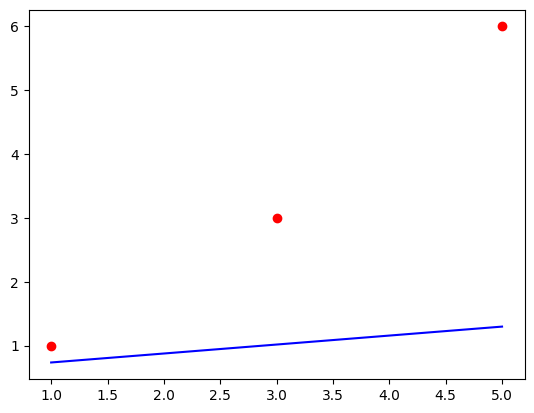

In [ ]:
x_line = np.linspace(min(x), max(x), 100)
y_line = a + b * x_line
plt.scatter(x, y, color='red', label='data points')
plt.plot(x_line, y_line, color='blue', label='Best fit')
plt.show()




Best lambda: 1.0
Test MSE: 0.8024691358024698
Best slope: 1.1111111111111112
Best intercept: 5.551115123125783e-17


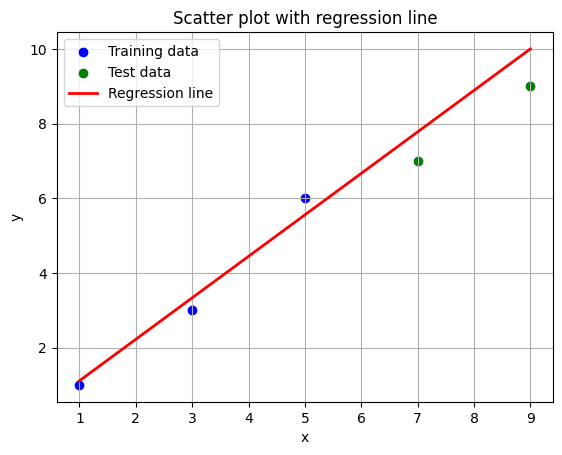

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points
x_train = np.array([1, 3, 5])
y_train = np.array([1, 3, 6])
x_test = np.array([7, 9])
y_test = np.array([7, 9])

# Regularization parameter lambda values to try
lambda_values = [0.0, 0.01, 0.1, 1.0, 10.0]

best_lambda = None
best_mse = float('inf')
best_a = None
best_b = None

for lmbda in lambda_values:
    # Calculate parameters using Ridge regression with regularization parameter lambda
    X_train = np.vstack((np.ones_like(x_train), x_train)).T
    X_test = np.vstack((np.ones_like(x_test), x_test)).T

    # Compute parameters using Ridge regression formula
    A = np.linalg.inv(X_train.T.dot(X_train) + lmbda * np.identity(X_train.shape[1])).dot(X_train.T).dot(y_train)

    # Calculate predictions
    y_pred_test = X_test.dot(A)

    # Calculate MSE on test data
    mse_test = np.mean((y_test - y_pred_test)**2)

    # Check if this lambda gives better MSE
    if mse_test < best_mse:
        best_mse = mse_test
        best_lambda = lmbda
        best_a = A[1]  # slope
        best_b = A[0]  # intercept

print('Best lambda:', best_lambda)
print('Test MSE:', best_mse)
print('Best slope:', best_a)
print('Best intercept:', best_b)

# Plot the scatter plot and regression line
plt.scatter(x_train, y_train, label='Training data', color='blue')
plt.scatter(x_test, y_test, label='Test data', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot with regression line')

# Plot the regression line
x_range = np.array([min(np.concatenate([x_train, x_test])), max(np.concatenate([x_train, x_test]))])
y_range = best_a * x_range + best_b
plt.plot(x_range, y_range, color='red', linewidth=2, label='Regression line')

plt.legend()
plt.grid(True)
plt.show()


Best lambda: 1.0, Test MSE: 0.09000879253392113


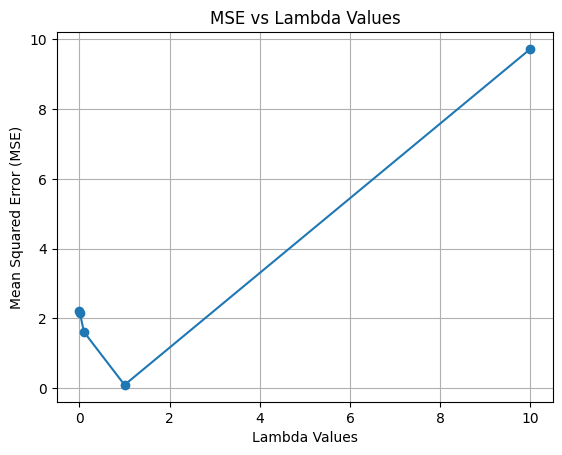

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points
x_train = np.array([1, 3, 5])
y_train = np.array([1, 3, 6])
x_test = np.array([7, 9])
y_test = np.array([7, 9])

# Learning rate
learning_rate = 0.01
# Initial guess for the parameters
a = 10
b = 10
# Number of iterations
num_iterations = 1000

# Regularization parameter lambda values to try
lambda_values = [0.0, 0.01, 0.1, 1.0, 10.0]

best_lambda = None
best_mse = float('inf')
mse_values = []

for lmbda in lambda_values:
    # Set initial values for a and b
    a = 10
    b = 10

    for i in range(num_iterations):
        # Compute predictions using current parameters
        y_pred = a * x_train + b

        # Compute gradients with regularization
        gradient_a = (-2/len(x_train)) * np.sum(x_train * (y_train - y_pred)) + 2 * lmbda * a
        gradient_b = (-2/len(x_train)) * np.sum(y_train - y_pred) + 2 * lmbda * b

        # Update parameters using gradients
        a -= learning_rate * gradient_a
        b -= learning_rate * gradient_b

    # Compute MSE on test data
    y_pred_test = a * x_test + b
    mse_test = np.mean((y_test - y_pred_test) ** 2)
    mse_values.append(mse_test)

    # Check if this lambda gives better MSE
    if mse_test < best_mse:
        best_mse = mse_test
        best_lambda = lmbda

print(f"Best lambda: {best_lambda}, Test MSE: {best_mse}")

# Plot the graph
plt.plot(lambda_values, mse_values, marker='o')
plt.xlabel('Lambda Values')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Lambda Values')
plt.grid(True)
plt.show()


Best lambda: 1.0, Test MSE: 0.09000879263097415


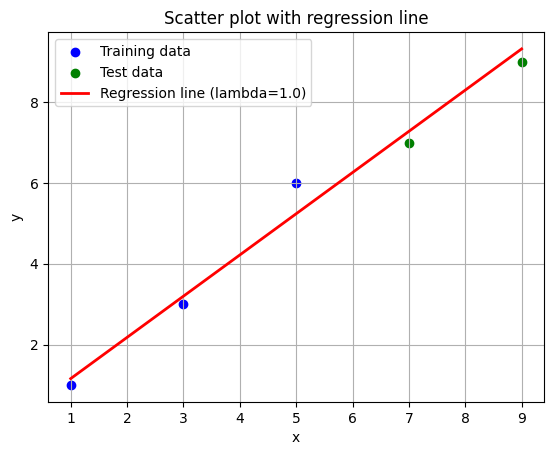

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points
x_train = np.array([1, 3, 5])
y_train = np.array([1, 3, 6])
x_test = np.array([7, 9])
y_test = np.array([7, 9])

# Learning rate
learning_rate = 0.01
# Initial guess for the parameters
a = 0.0
b = 0.0
# Number of iterations
num_iterations = 1000

# Regularization parameter lambda values to try
lambda_values = [0.0, 0.01, 0.1, 1.0, 10.0]

best_lambda = None
best_mse = float('inf')
best_a = None
best_b = None

# Gradient descent with Ridge regularization
for lmbda in lambda_values:
    a = 0.0
    b = 0.0
    for i in range(num_iterations):
        # Predicted values using current parameters
        y_pred = a * x_train + b

        # Compute gradients with Ridge regularization
        gradient_a = (-2/len(x_train)) * np.sum(x_train * (y_train - y_pred)) + 2 * lmbda * a
        gradient_b = (-2/len(x_train)) * np.sum(y_train - y_pred) + 2 * lmbda * b

        # Update parameters using gradients
        a -= learning_rate * gradient_a
        b -= learning_rate * gradient_b

    # Compute MSE on test data
    y_pred_test = a * x_test + b
    mse_test = np.mean((y_test - y_pred_test) ** 2)

    # Check if this lambda gives better MSE
    if mse_test < best_mse:
        best_mse = mse_test
        best_lambda = lmbda
        best_a = a
        best_b = b

print(f"Best lambda: {best_lambda}, Test MSE: {best_mse}")

# Plot the scatter plot and regression line
plt.scatter(x_train, y_train, label='Training data', color='blue')
plt.scatter(x_test, y_test, label='Test data', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot with regression line')

# Plot the regression line with optimal lambda
x_range = np.linspace(min(x_train.min(), x_test.min()), max(x_train.max(), x_test.max()), 100)
y_range = best_a * x_range + best_b
plt.plot(x_range, y_range, color='red', linewidth=2, label=f'Regression line (lambda={best_lambda})')

plt.legend()
plt.grid(True)
plt.show()
